# Exploratory Data Analysis

In [1]:
import os
import sys
import re
import traceback
import pandas as pd
import numpy as np


sys.path.append(os.path.join(os.path.dirname(os.getcwd()),'dags','src'))

import config
import helpers
import preprocess

import importlib
importlib.reload(config)
importlib.reload(helpers)
importlib.reload(preprocess)

import warnings
warnings.filterwarnings('ignore')

In [2]:
job_id = helpers.generate_uuid()
job_id

'0adbcce8ebbb439193da11a647c0fdde'

In [3]:
data_path = os.path.join(config.PATH_DIR_DATA, 'source', '2021_06_01_data.csv')
df = pd.read_csv(data_path)

## High level description

In [4]:
df.head(3)

,loan_id,customer_id,loan_status,application_time,current_loan_amount,term,tax_liens,purpose,no_of_properties,home_ownership,...,no_of_cars,no_of_children,credit_score,monthly_debt,years_of_credit_history,no_of_open_accounts,no_of_credit_problems,current_credit_balance,max_open_credit,bankruptcies
0,abf3db48-e6fb-4ac5-884a-598f1a2979fc,00024ad3-b367-44e3-81ff-4bee18ed00b4,loan given,2015-07-19 10:17:00,99999999.0,short term,0.0,debt consolidation,4.0,home mortgage,...,0.0,1.0,747.0,1414.73,26.0,9.0,0.0,33575.0,0,0.0
1,f36ec981-8ad7-4757-9541-d9d6d8561bb3,0003f10e-f8f4-4eb1-9bb8-b980fdda707c,loan given,2015-10-03 10:34:00,11940.0,short term,0.0,debt consolidation,4.0,own home,...,5.0,1.0,NaN,1439.44,21.0,12.0,0.0,6267.0,49343,0.0
2,7661d390-2394-4ee1-b2e7-8440f8c5f978,000685bc-92e8-44ca-9943-7668d3efc988,loan given,2015-07-06 13:54:00,9843.0,short term,0.0,debt consolidation,2.0,rent,...,0.0,2.0,735.0,1361.18,33.0,18.0,0.0,4554.0,24752,0.0


In [5]:
print(f"size : {df.shape}")
print('columns datatypes :')
print(df.dtypes)

size : (30304, 23)
columns datatypes :
loan_id                          object
customer_id                      object
loan_status                      object
application_time                 object
current_loan_amount             float64
term                             object
tax_liens                       float64
purpose                          object
no_of_properties                float64
home_ownership                   object
annual_income                   float64
years_in_current_job             object
months_since_last_delinquent    float64
no_of_cars                      float64
no_of_children                  float64
credit_score                    float64
monthly_debt                     object
years_of_credit_history         float64
no_of_open_accounts             float64
no_of_credit_problems           float64
current_credit_balance          float64
max_open_credit                  object
bankruptcies                    float64
dtype: object


In [6]:
print("data description")
df.describe(include="all").T

data description


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_id,30304,30304,abf3db48-e6fb-4ac5-884a-598f1a2979fc,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,30304,30304,00024ad3-b367-44e3-81ff-4bee18ed00b4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_status,30304,2,loan given,23018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_time,30304,24123,2015-10-16 11:36:00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_loan_amount,30304.0,NaN,NaN,NaN,11459807.737757,31834569.774972,976.0,8142.0,14052.0,23628.0,99999999.0
term,30304,2,short term,22111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax_liens,30301.0,NaN,NaN,NaN,0.029042,0.247525,0.0,0.0,0.0,0.0,10.0
purpose,30304,15,debt consolidation,23853,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_properties,30304.0,NaN,NaN,NaN,1.990199,1.418153,0.0,1.0,2.0,3.0,4.0
home_ownership,19539,4,home mortgage,9595,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

In [7]:
## enforce datatypes

def enforce_numeric_to_float(x: str) -> float:
    """
    Converts a string to a float, or returns `np.nan` if the string is not a valid float.

    Parameters:
        x: The string to be converted to a float.

    Returns:
        The float representation of the string, or `np.nan` if the string could not be converted to a float.
    """
    
    try:
        return float(re.sub("[^0-9.]","", str(x)))
    except ValueError:
        return np.nan

def enforce_datatypes(df: pd.DataFrame, cat_vars: list=[], num_vars: list=[]) -> pd.DataFrame:
    """
    Enforces the data types of the columns in a pandas DataFrame.

    Args:
        df: The pandas DataFrame to be updated.
        cat_vars: A list of the categorical variables in the DataFrame.
        num_vars: A list of the numeric variables in the DataFrame.

    Returns:
        The pandas DataFrame with the enforced data types.
    """

    df["application_time"] = pd.to_datetime(df["application_time"])
    df[num_vars] = df[num_vars].apply(enforce_numeric_to_float)
    df[cat_vars] = df[cat_vars].astype(str)
    return df

In [8]:
## features engineering

def month_to_season(month: int) -> int:
    """
    Convert month to season.
    
    Args:
    month (int): The input month (1-12).
    
    Returns:
    int: The corresponding season (1: Winter, 2: Spring, 3: Summer, 4: Fall).
    If the input month is not in the valid range (1-12), returns -1 to indicate an error.
    """
    if 1 <= month <= 3:
        return 1  # Winter
    elif 4 <= month <= 6:
        return 2  # Spring
    elif 7 <= month <= 9:
        return 3  # Summer
    elif 10 <= month <= 12:
        return 4  # Fall
    else:
        return np.nan  # Invalid month


def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Engineer new features based on the application_time column.
    
    Args:
    df (pd.DataFrame): The input DataFrame with application_time column.
    
    Returns:
    pd.DataFrame: The DataFrame with added engineered features.
    """
    # Check if the necessary columns are present in the DataFrame
    assert "application_time" in df.columns, f"application_time not in {df.columns}"
    
    # Extract date-based features from the application_time column
    df["application_date"] = df["application_time"].dt.date
    df["application_year"] = df["application_time"].dt.year
    df["application_month"] = df["application_time"].dt.month
    df["application_week"] = df["application_time"].dt.isocalendar().week  
    df["application_day"] = df["application_time"].dt.day
    
    # Map application_month to application_season using month_to_season function
    df["application_season"] = df["application_month"].apply(lambda x: month_to_season(x))
    
    # Calculate current_credit_balance_ratio while handling division by zero
    df["current_credit_balance_ratio"] = (df["current_credit_balance"] / df["current_loan_amount"]).fillna(0.0)
    
    return df



In [9]:
## Encode categorical features

def categorize_years_in_current_job(x: str) -> int:
    """
    Categorize years in current job into numerical values.
    
    Args:
    x (str): The input string representing years in current job.
    
    Returns:
    int: The categorized numerical value representing years in current job.
    """
    x = str(x).strip()  # Clean up input by removing leading/trailing spaces
    
    if x == '< 1 year':
        return 0  # Special case for less than 1 year
    
    if x in ('1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10 years'):
        return int(re.sub("[^0-9]", "", x))  # Extract numerical value from the string
    
    if x == '10+ years':
        return 11  # Special case for 10 or more years
    
    return -1  # Return -1 for unrecognized cases


def term_to_int(x: str) -> int:
    """
    Convert term (lowercased) to integer representation.
    
    Args:
    x (str): Lowercased term ("short term" or "long term").
    
    Returns:
    int: Integer representation of the term (0 for "short term", 1 for "long term"),
    or np.nan for unrecognized cases.
    """
    if x == "short term":
        return 0
    elif x == "long term":
        return 1
    else:
        return np.nan  # Return np.nan for unrecognized cases



def home_ownership_to_int(x: str) -> int:
    """
    Convert home ownership (lowercased) to integer representation.
    
    Args:
    x (str): Lowercased home ownership status.
    
    Returns:
    int: Integer representation of home ownership
    (0 for "rent", 1 for "mortgage", 2 for "own"),
    or np.nan for unrecognized cases.
    """
    if x == "rent":
        return 0
    elif "mortgage" in x:
        return 1
    elif "own" in x:
        return 2
    else:
        return np.nan  # Return np.nan for unrecognized cases


def purpose_to_float(x: pd.Series, method: str = None) -> pd.Series:
    """
    Convert purpose (categorical) to float using different methods.
    
    Args:
    x (pd.Series): The input series containing categorical values.
    method (str): Method for converting (options: "ranking", "weighted ranking", "relative ranking").
    
    Returns:
    pd.Series: The transformed series.
    """
    valid_methods = ["ranking", "weighted ranking", "relative ranking"]
    assert method in valid_methods, f"{method} is not a valid method ({', '.join(valid_methods)})"
    
    val_counts = x.value_counts()
    
    if method == "ranking":
        uniq_vals = sorted(val_counts.unique(), reverse=False)
        val_to_int = dict(zip(uniq_vals, range(1, len(uniq_vals) + 1)))
        model = val_counts.apply(lambda x: val_to_int[x]).to_dict()
        return x.apply(lambda x: model.get(x, 0))
    
    if method == "relative ranking":
        model = (val_counts / val_counts.max()).to_dict()
        return x.apply(lambda x: model.get(x, 0))
    
    if method == "weighted ranking":
        model = (val_counts / val_counts.sum()).to_dict()
        return x.apply(lambda x: model.get(x, 0))


def loan_status_to_int(x: str) -> int:
    """
    Convert loan status (lowercased) to integer representation.
    
    Args:
    x (str): Lowercased loan status.
    
    Returns:
    int: Integer representation of loan status
    (0 for "loan refused", 1 for "loan given"),
    or the input value itself if it's not recognized.
    """
    valid_statuses = ("loan given", "loan refused")
    assert x in valid_statuses or isinstance(x, int), f"{x} is not a valid loan status and is not an integer"
    
    x = str(x).strip()  # Clean up input by removing leading/trailing spaces
    
    if x == "loan refused":
        return 0
    if x == "loan given":
        return 1
    
    return x  # Return the original value if it's not recognized as a valid loan status


def encode_categorical_features(df: pd.DataFrame, purpose_encode_method="ranking") -> pd.DataFrame:
    """
    Encode categorical features in the DataFrame.
    
    Args:
    df (pd.DataFrame): The input DataFrame containing categorical features.
    purpose_encode_method (str): Encoding method for the 'purpose' feature
                                 (options: "ranking", "weighted ranking", "relative ranking").
    
    Returns:
    pd.DataFrame: The DataFrame with encoded categorical features.
    """
    for col in config.CAT_VARS:
        assert col in df.columns, f"{col} not in {df.columns}"
        df[col] = df[col].str.lower()

    df["term"] = df["term"].apply(lambda x: term_to_int(x))
    df["home_ownership"] = df["home_ownership"].apply(lambda x: home_ownership_to_int(x))  
    df["years_in_current_job"] = df["years_in_current_job"].apply(lambda x: categorize_years_in_current_job(x))
    
    if config.TARGET.lower() in df.columns:
        df[config.TARGET.lower()] = df[config.TARGET.lower()].apply(lambda x: loan_status_to_int(x))
    
    df["purpose"] = purpose_to_float(df["purpose"], method=purpose_encode_method)
    
    return df


In [10]:
## Missing values

import pandas as pd

def get_features_with_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Get features (columns) with missing values in the DataFrame.
    
    Args:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    list: A list of column names with missing values.
    """
    missing_counts = df.isnull().sum()  # Count missing values for each column
    return missing_counts[missing_counts > 0].index.tolist()  # Get column names with non-zero missing value counts



def impute_missing_values(df: pd.DataFrame, columns_with_nas=[], cat_vars: list = config.CAT_VARS, num_vars: list = config.NUM_VARS) -> pd.DataFrame:
    """
    Treat missing values in the DataFrame.
    
    If the column with missing values is a categorical variable, impute it with the most frequent value.
    If the column with missing values is a numerical variable, impute it with the mean value.
    
    Args:
    df (pd.DataFrame): The input DataFrame.
    columns_with_nas (list): Columns with missing values. Default is an empty list.
    cat_vars (list): List of categorical variables. Default is from the config module.
    num_vars (list): List of numerical variables. Default is from the config module.
    
    Returns:
    pd.DataFrame: The DataFrame with missing values imputed.
    """
    model = dict()
    
    if columns_with_nas != []:
        cols = columns_with_nas
    else:
        cols = df.columns.tolist()

    for col in cols:
        try:
            print("[INFO] Treating missing values in column:", col)
            model[col] = dict()
            
            if col in cat_vars:
                model[col]['mode'] = df[df[col].notnull()][col].mode()[0]
                df[col].fillna(model[col]['mode'], inplace=True)
            elif col in num_vars:
                model[col]['mean'] = df[df[col].notnull()][col].mean()
                df[col].fillna(model[col]['mean'], inplace=True)
            elif col in config.DATETIME_VARS:
                model[col]['mode'] = df[df[col].notnull()][col].mode()[0]
                df[col].fillna(model[col]['mode'], inplace=True)
            elif col in ["loan_id", "customer_id", "loan_status"] + config.EXC_VARIABLES:
                pass
            else:
                warnings.warn(f"[WARNING] {col} is not a valid variable")
        except:
            traceback.print_exc()
    
    return df


In [11]:
# # drop all rows where customer_id or loan_id is missing
df = df[df["customer_id"].notnull() & df["loan_id"].notnull() & df["loan_status"].notnull()]

# enforce datatypes
df = enforce_datatypes(df, cat_vars=config.CAT_VARS, num_vars=config.NUM_VARS)

# engineer new variables
df = engineer_features(df)

# encode categorical features
df = encode_categorical_features(df, purpose_encode_method="weighted ranking")

# variables with missing values
vars_with_nas = get_features_with_missing_values(df)

# imputing missing values
df = impute_missing_values(df, columns_with_nas=vars_with_nas)
print("columns with missing values - post treatment:", get_features_with_missing_values(df))

[INFO] Treating missing values in column: current_loan_amount
[INFO] Treating missing values in column: tax_liens
[INFO] Treating missing values in column: no_of_properties
[INFO] Treating missing values in column: home_ownership
[INFO] Treating missing values in column: annual_income
[INFO] Treating missing values in column: months_since_last_delinquent
[INFO] Treating missing values in column: no_of_cars
[INFO] Treating missing values in column: no_of_children
[INFO] Treating missing values in column: credit_score
[INFO] Treating missing values in column: monthly_debt
[INFO] Treating missing values in column: years_of_credit_history
[INFO] Treating missing values in column: no_of_open_accounts
[INFO] Treating missing values in column: no_of_credit_problems
[INFO] Treating missing values in column: current_credit_balance
[INFO] Treating missing values in column: max_open_credit
[INFO] Treating missing values in column: bankruptcies
columns with missing values - post treatment: ['curre

In [ ]:
training_df = pd.read_csv("../dags/data/preprocessed/12196ecaa65e4831987aee4bfced5f60_training.csv")
inference_df = pd.read_csv("../dags/data/preprocessed/12196ecaa65e4831987aee4bfced5f60_inference.csv")

# Statistical tests

In [12]:
from scipy.stats import ttest_ind, chi2_contingency
import matplotlib.pyplot as plt

In [13]:
def target_vs_numerical(df: pd.DataFrame, x: str, y: str) -> float:
    """
    Plot and compare the target variable as a function of a numerical predictor.
    
    Args:
        df: pd.DataFrame, dataset
        x: str, predictor
        y: str, target
    
    Returns:
        p_val: float, p-value from t-test
    """
    t_stat, p_val = ttest_ind(df[df[y] == 0][x], df[df[y] == 1][x], equal_var=False)
    df.boxplot(column=x, by=y, grid=False, showfliers=False)
    plt.suptitle('')
    plt.title(f"{x} - p_val: {p_val}")
    plt.ylabel(x)
    plt.show()
    return p_val

def target_vs_categorical(df: pd.DataFrame, x: str, y: str) -> float:
    """
    Plot and compare the target variable as a function of a categorical predictor.
    
    Args:
        df: pd.DataFrame, dataset
        x: str, predictor
        y: str, target
    
    Returns:
        p_val: float, p-value from chi-square test
    """
    crosstab = pd.crosstab(df[x], df[y])
    chi2_stat, p_val, _, _ = chi2_contingency(crosstab)
    crosstab.plot(kind='barh', logx=True)
    plt.title(f"{x} - p_val: {p_val}")
    plt.show()
    return p_val

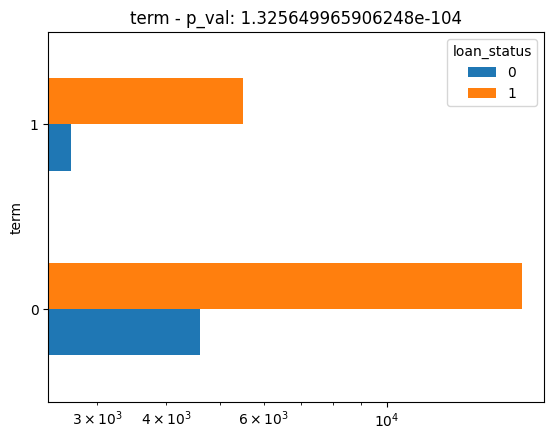

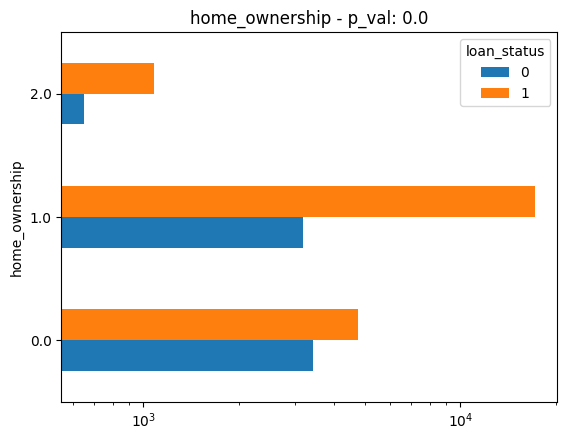

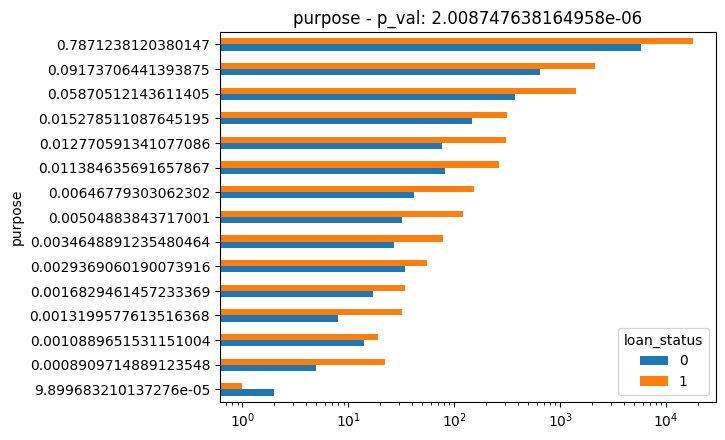

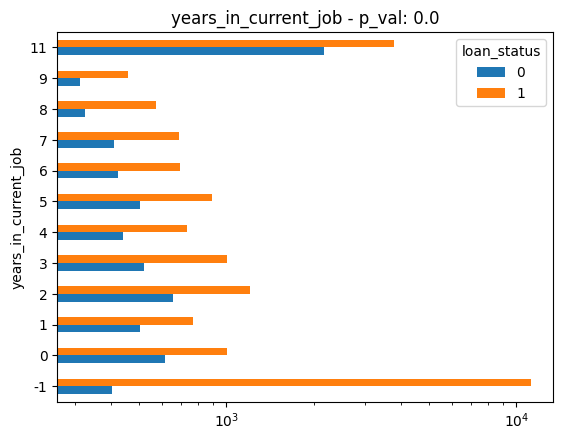

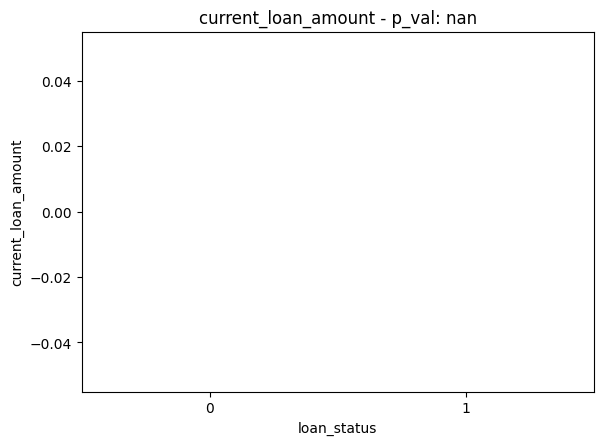

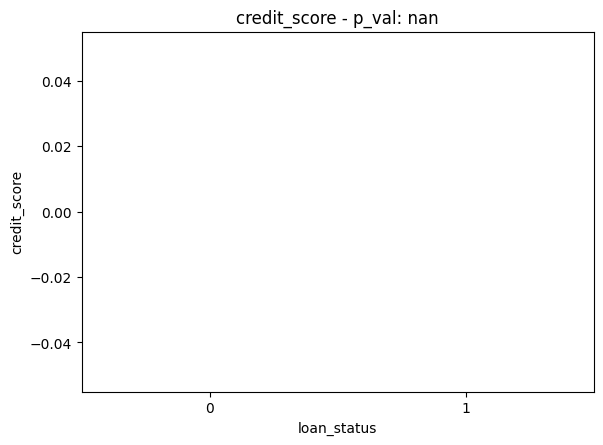

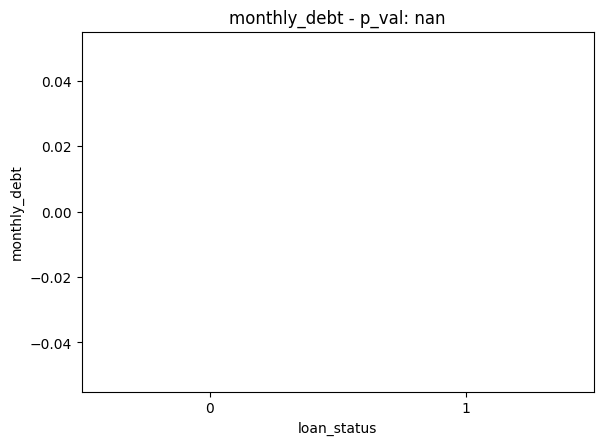

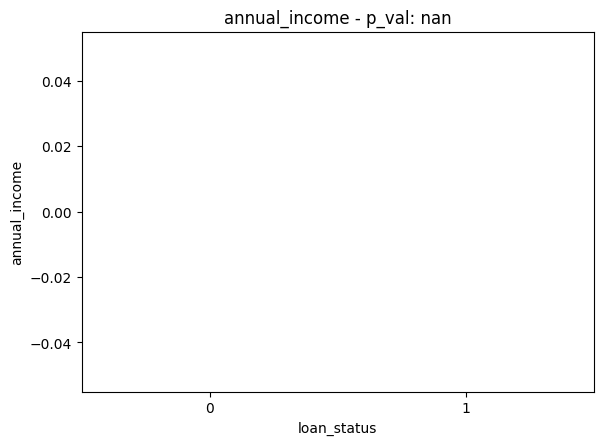

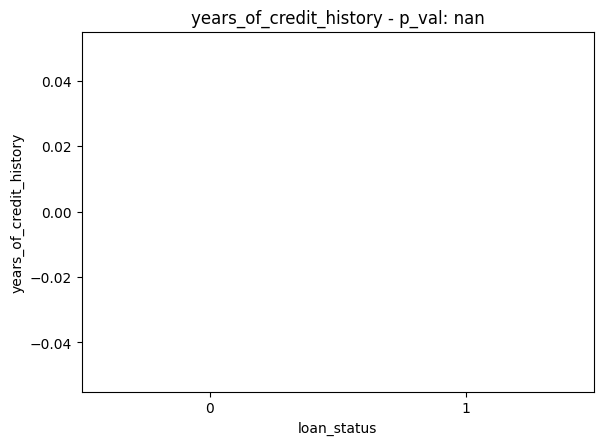

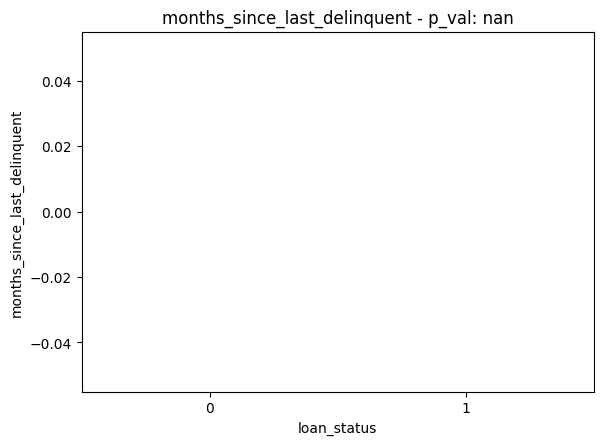

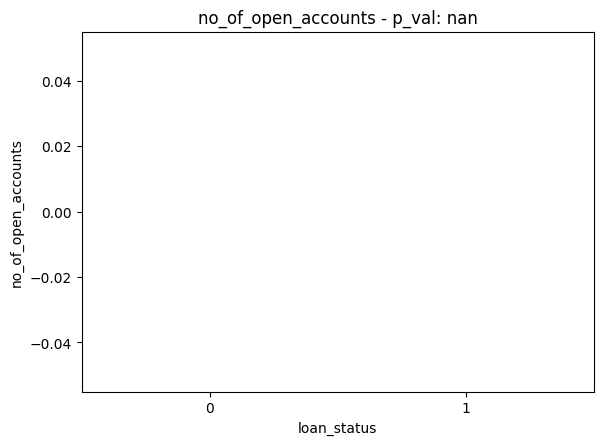

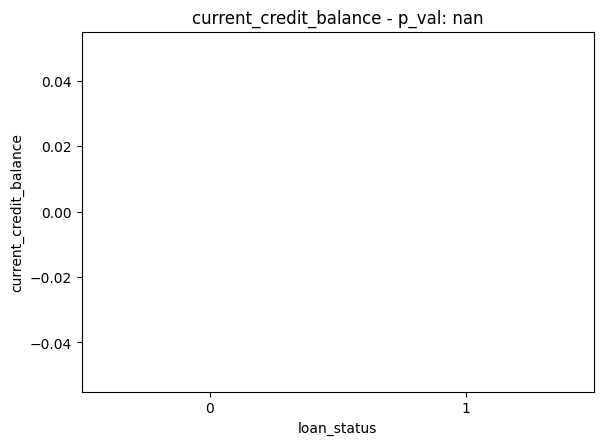

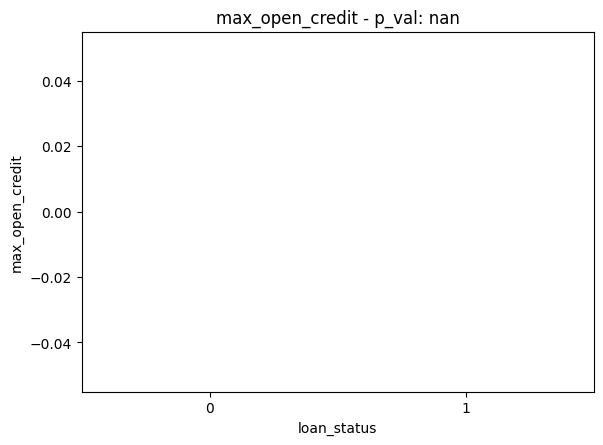

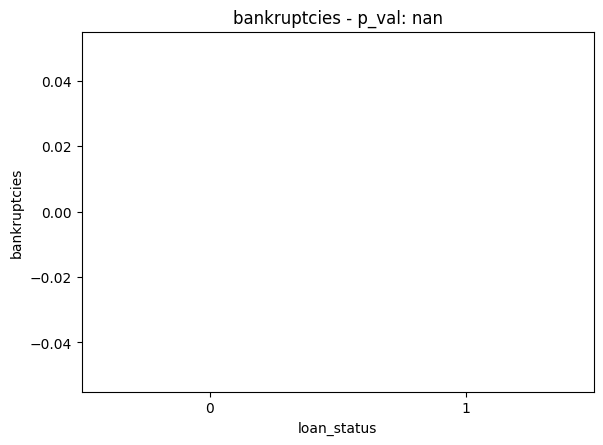

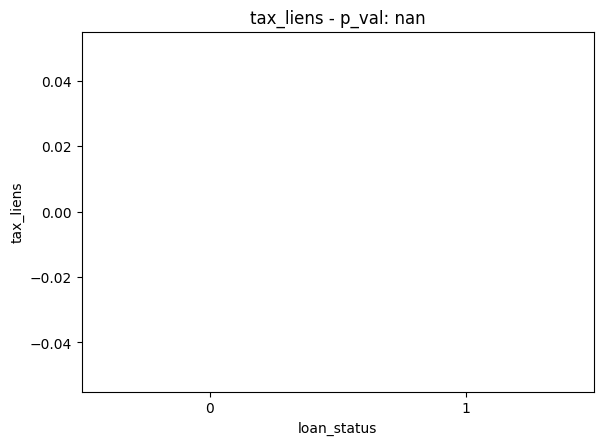

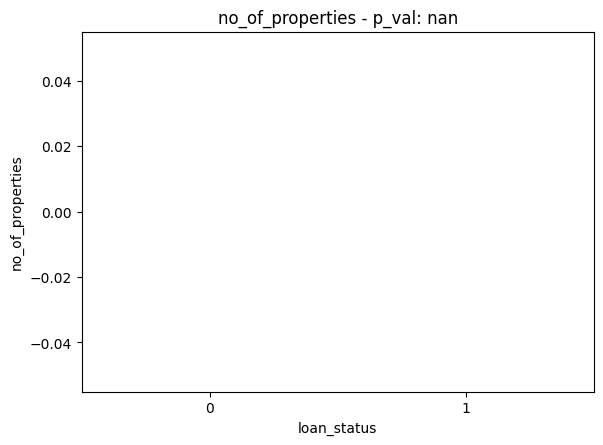

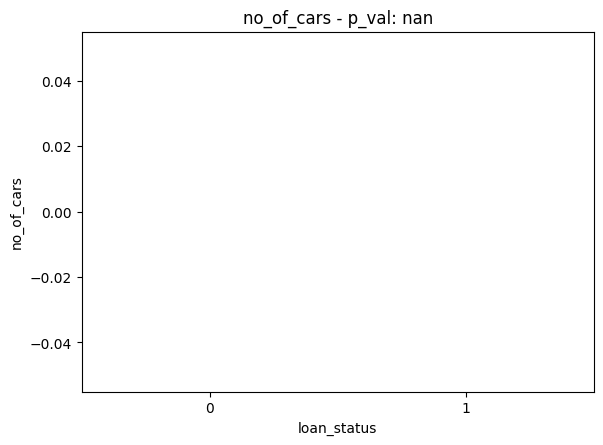

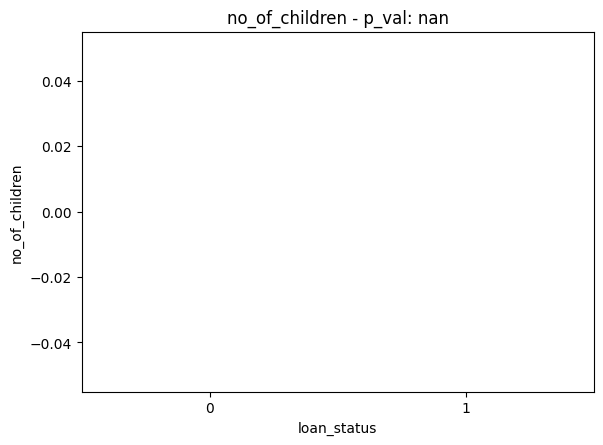

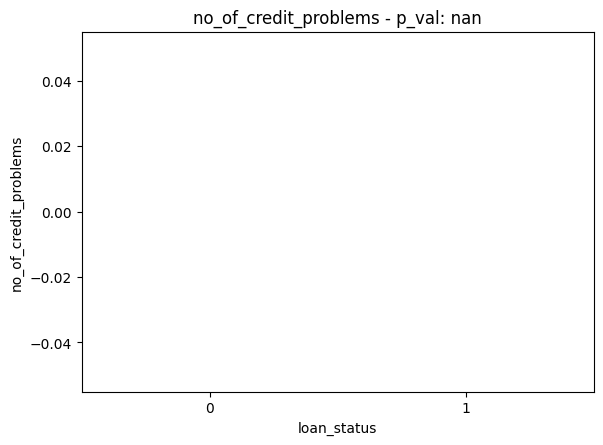

In [14]:
predictors_evaluation = dict()
for col in config.CAT_VARS:
    predictors_evaluation[col] = target_vs_categorical(df, x=col, y='loan_status')

for col in config.NUM_VARS:
    predictors_evaluation[col] = target_vs_numerical(df, x=col, y='loan_status')